# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x);

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2;

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [10]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin);

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [16]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N%2==0:
        N=N
    else:
        N=N+1
    Delta=(xmax-xmin)/(N)
    sum_even=0
    sum_odd=0
    for i in range(1,N):
        if i % 2 == 0:
            sum_even += f(xmin+i*Delta)
        else:
            sum_odd += f(xmin+i*Delta)
    return (Delta/3)*(f(xmin)+2*sum_even+4*sum_odd+f(xmax));

Make sure you have implemented Simpson's rule correctly:

In [17]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [18]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


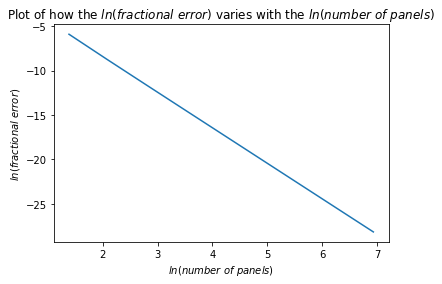

In [19]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = numpy.array([4, 8, 16, 32, 64, 128, 256, 512, 1024]) # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric=[]
for i in range(len(panel_counts)):
    result_numeric.append(integrate_numeric(x0, x1, panel_counts[i]))
error_fractional = numpy.abs(result_analytic-result_numeric)/numpy.abs(result_analytic)
plt.plot(numpy.log(panel_counts),numpy.log(error_fractional))
plt.xlabel("$ln(number$ $of$ $panels)$")
plt.ylabel("$ln(fractional$ $error)$")
plt.title("Plot of how the $ln(fractional$ $error)$ varies with the $ln(number$ $of$ $panels)$")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels reduces the fractional error and hence increases the accuracy up to a point. However as the number of panels increases, the fractional error decreases as $exp(-panel_{ }\text{_}counts)$, and so after less than 10 panels, increasing the panel count has very little effect on the fractional error and is just wasted computational power. 

In addition, if the panel count is too large (around 5000), then the accuracy will decrease with increasing panel count, due to numerical imprecision in the computer with very small floats.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The trapezium rule reduces the fractional error at a lower rate than the Simpson rule, i.e. it is less accurate than the Simpson rule for a set number of panels. This means that it requires more panels in the trapezium rule to achieve the same accuracy as the Simpson rule, and as such, increasing the panel count increases the accuracy almost linearly up until a very high number of panels. It takes a much higher number of panels to see the affect of the computer's numerical imprecision with the trapezium rule than it does with the Simpson rule, and hence there is less of a problem of the panel count being too large. 